In [2]:
%matplotlib inline

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)


In [3]:
#Read_the_data
train_df=pd.read_csv("Data/train.csv")
test_df=pd.read_csv("Data/test.csv")
df1=train_df.copy()

In [ ]:
#y_train=train_df['variety']

In [ ]:
#train_df = train_df.drop(columns="variety")

## Data Cleaning

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [167]:
#train_df=df1

In [43]:
train_df.shape

(82657, 12)

In [7]:
train_df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Plot Country Wise data

In [26]:
wn_country = train_df.groupby(['country']).count()[["province"]].apply(lambda x : 100*x/x.sum())
wn_country.head()

,province
country,
Argentina,3.110552
Australia,1.244221
Austria,2.289947
Brazil,0.033889
Bulgaria,0.112561


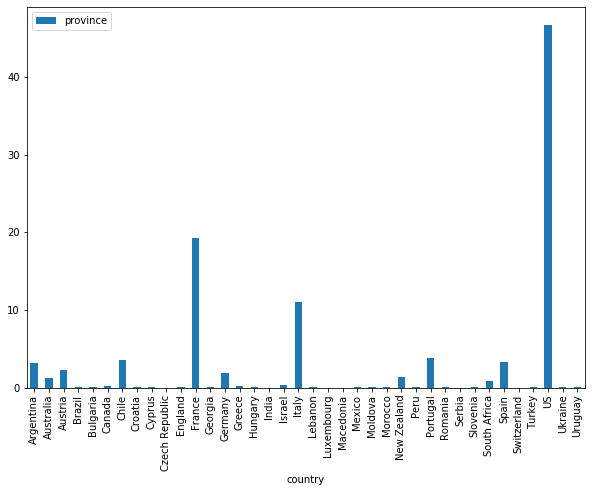

In [85]:
#Plot Normalized Data

wn_country.plot(kind='bar')


## Most Common Winery

In [12]:
#Function to get the most common item
from collections import Counter
def get_most_common_item(df):
    c=Counter(df)
    return c.most_common()

In [15]:
cw=get_most_common_item(train_df["winery"])
print("Most wine trade is from \"{}\" with a count of {}.\n".format(cw[0][0],cw[0][1]))

Most wine trade is from "Testarossa" with a count of 175.



In [35]:
items_by_winery = train_df.groupby(['country'])[['winery']].count().apply(lambda x : 100*x/x.sum())
items_by_winery.head()

,winery
country,
Argentina,3.110552
Australia,1.244221
Austria,2.289947
Brazil,0.033889
Bulgaria,0.112561


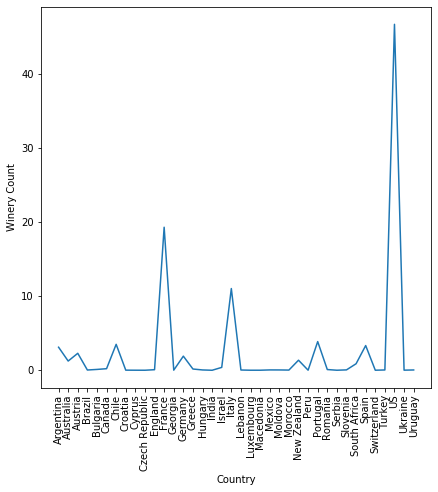

In [36]:
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Winery Count")
plt.plot(items_by_winery)

## Insights
- From the above plot we can say that US has higest number of winerys

In [37]:
vc=get_most_common_item(train_df["variety"])
print("Most wine trade is from \"{}\" with a count of {}.\n".format(vc[0][0],vc[0][1]))

Most wine trade is from "Pinot Noir" with a count of 10587.



In [38]:
items_by_variety = train_df.groupby(['country'])[['variety']].size()
items_by_variety.head()

country
Argentina    2570
Australia    1028
Austria      1892
Brazil         28
Bulgaria       93
dtype: int64

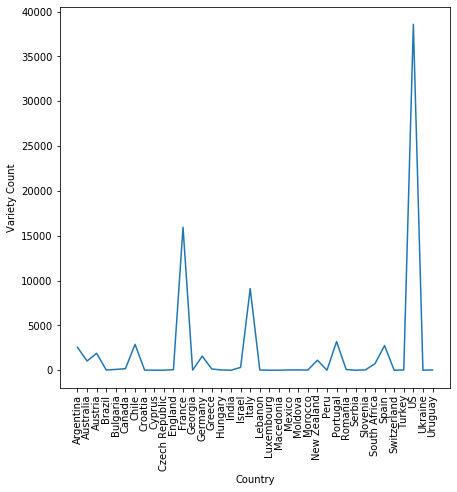

In [39]:
#Plots
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Variety Count")
plt.plot(items_by_variety)

## Insights
- It is sure that the country with highest number of winerys has more number of varieties than others.
- US has large amount of varieties of wines.

## Plot on No of provinces in each country.

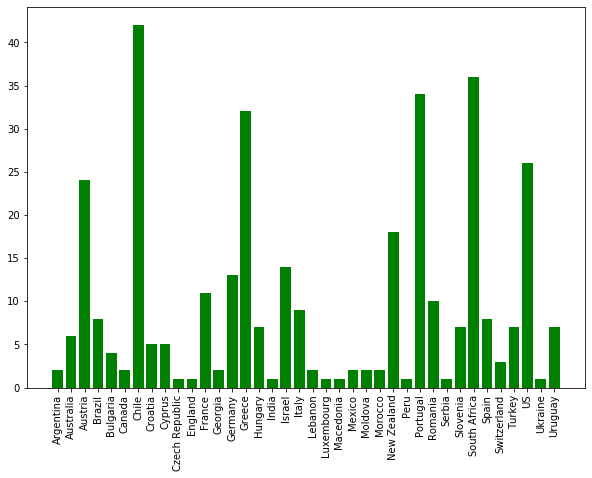

In [102]:

items_by_c=train_df.groupby(['country','province'])['variety'].unique()
tst=items_by_c.index
location_cluster={}
for i in tst:
    if(i[0]) in location_cluster:
        
        location_cluster[i[0]]+=1
    else:
        location_cluster[i[0]]=1
        
plt.bar(location_cluster.keys(), location_cluster.values(), color='g')
plt.xticks(rotation=90)
plt.show()

## No of Varieties classification based on country

In [113]:
items_by_v=train_df.groupby(['country'])['variety'].count()
items_by_v

array([ 2570,  1028,  1892,    28,    93,   176,  2891,    12,     6,
           3,    62, 15948,    12,  1573,   139,    35,     1,   320,
        9112,    28,     5,     5,    38,    35,    21,  1121,     8,
        3197,    80,     4,    42,   727,  2755,     5,    33, 38573,
          11,    33])

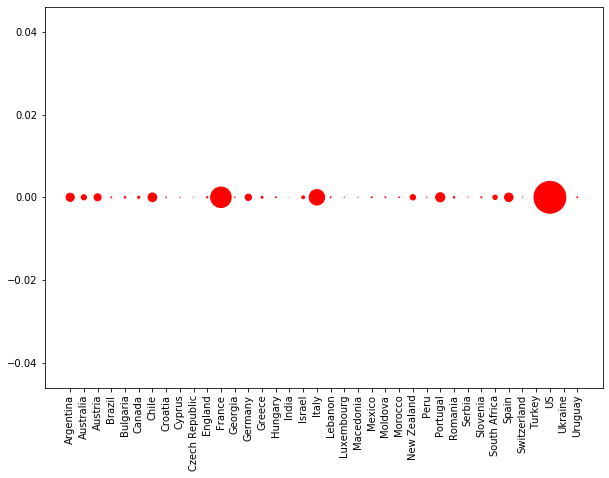

In [149]:
cnt=1
var_cnt=[]
for i in items_by_v.index:
    var_cnt.append(i)
    cnt+=2
x = var_cnt
y = [0]*len(x)
n=len(y)
s = [i/n for i in items_by_v]
plt.scatter(x,y,s=s,color='r')
plt.xticks(rotation=90)
plt.show()

- Plot which shows the total number of varieties by country.
- Larger the size of circle, more no of varieties in that country

## Drop the columns which are not necesssary

In [157]:
train_df.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [155]:
y_train=train_df["variety"]

In [156]:
def drop_cols(df,cols):
    return df.drop(columns=cols)

In [159]:
#Remove the Unnecessary data_columns
cleaned_df=drop_cols(train_df,["designation","review_title","user_name","region_2","country","region_1","province"])

## Dealing with null values

In [162]:
cleaned_df.isnull().sum()

review_description       0
points                   0
price                 5569
winery                   0
variety                  0
dtype: int64

- As we have null values in price columnwe impute that particluar column

In [182]:
from sklearn.impute import SimpleImputer
def impute(df):
    x=df.values
    x=x.reshape(-1,1)
    imp=SimpleImputer(strategy='mean')
    imp.fit(x)
    return (imp.transform(x))

In [ ]:
price1=impute(cleaned_df['price'])
cleaned_df=drop_cols(cleaned_df,["price"])
cleaned_df['price']=price1

In [185]:
cleaned_df.isnull().sum()

review_description    0
points                0
winery                0
variety               0
dtype: int64

In [186]:
cleaned_df.to_pickle('cleaned.pkl')

## Review Description